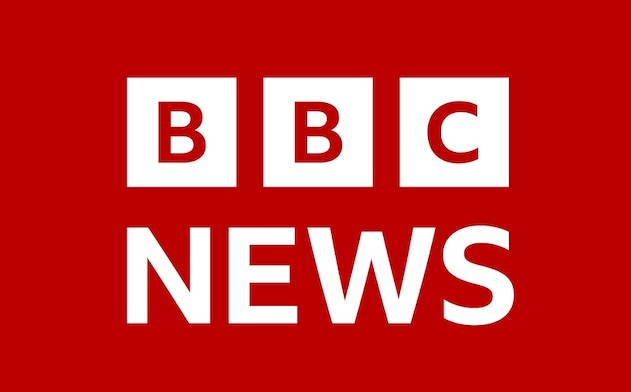
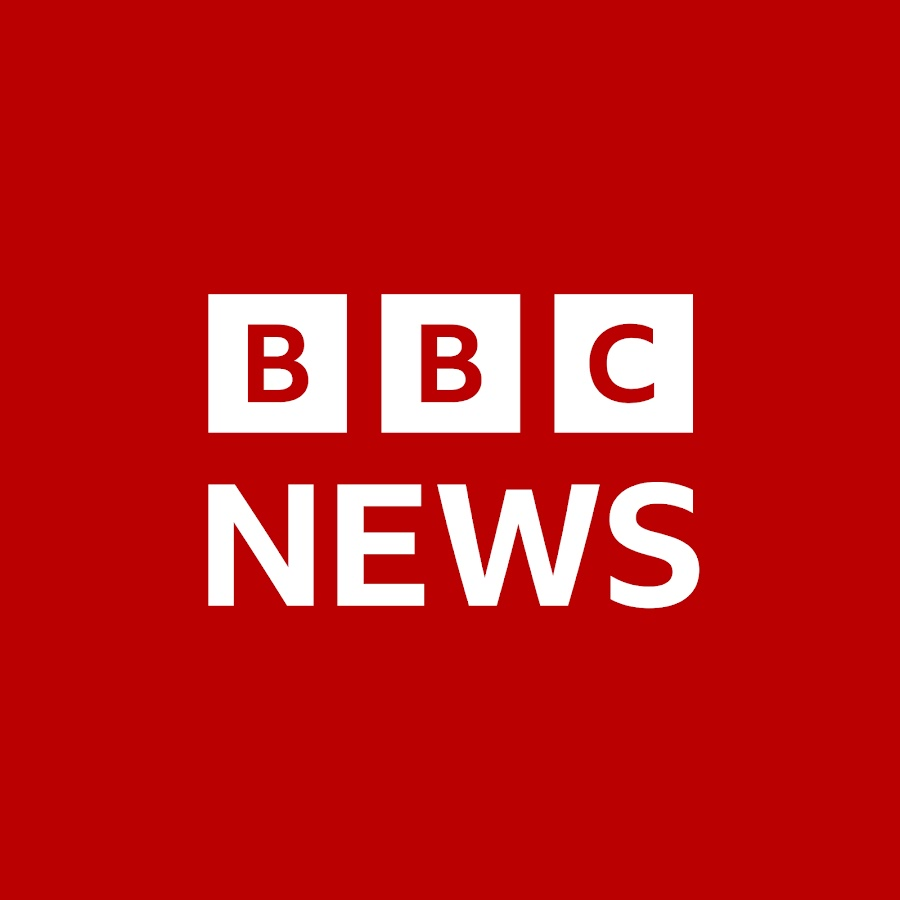

In this notebook, first I am going to categorize the BBC articles in terms of their text complexity. In a second stage, I am summarizing each article's text by means of two different techniques. In particular, to do that I am going to use the modules 'TextRankSummarizer' and
'LsaSummarizer'.

### SUMMARY

1. Load the Data
2. Exploratory Data Analysis
3. Text Complexity
4. Text Summarization
5. Update the BBC News Dataset

# 1. Load the Data

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

from plotly import figure_factory as FF
from plotly.offline import iplot

from warnings import simplefilter
simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

I am loading the dataset.

In [ ]:
pd.set_option('display.max_colwidth',None)
df = pd.read_csv('/kaggle/input/bbc-articles-dataset/archive/bbc_text_cls.csv')

df.head(2)

Then, I am printing the data shape (no. of rows and columns).

In [ ]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

In [ ]:
print(f"These are the column names: '{list(df.columns)[0]}', '{list(df.columns)[1]}'.")

I am checking whether there are null and/or duplicate entries.

In [ ]:
# No. of null values in the columns
df.isna().sum()

Fortunately, there are no null values in the dataset.

In [ ]:
# No. of duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows: {df.duplicated().sum()/len(df)*100:.1f}% of the total entries.')

I am dropping the duplicate entries.

In [ ]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

# 2. Exploratory Data Analysis

## 2.1 Article Classes

In [ ]:
article_count = df.groupby('labels')['labels'].count().reset_index(name='count').sort_values(by='count',ascending=False)

plt.figure(figsize=(12,6))

plt.bar(data=article_count,x='labels',height='count',color=['red','orange','y','g','navy'],edgecolor='black')
plt.xlabel('article class',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Article Classes in BBC News',fontsize=30)

plt.tight_layout()

As shown in the plot, one can notice that:

* There are 5 target classes. They represent the main topics of the BBC articles.
* There is a relatively good balance between the classes. The maximum difference in count between them is of the order of 20%. 

## 2.2 Text

I want to check if the sport, business ... type articles differ by the word length, number of words, number of sentences, most frequent words, and so on.

In [ ]:
# Number of sentences in the text column
df['no_sentences'] = df['text'].str.count('[\w][\.!\?]')

# Average number of sentences by article class
avg_no_sentences = df.groupby('labels')['no_sentences'].mean().reset_index(name='avg. no. of sentences').sort_values(by='avg. no. of sentences',ascending=False)

In [ ]:
fig = plt.figure(figsize=(12,6))
(topfig,bottomfig) = fig.subfigures(2,1)

### Top figures ###
topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(12,5))

wd_len_sp = df[df['labels']=='sport']['text'].str.split().map(lambda x: len(x))
ax1.hist(wd_len_sp,color='red',edgecolor='black',linewidth=1.2)
ax1.set_title('sport articles',size=10)
ax1.set_xlabel('no. of words',size=10)
ax1.set_ylabel('count',size=10)

wd_len_bus = df[df['labels']=='business']['text'].str.split().map(lambda x: len(x))
ax2.hist(wd_len_bus,color='orange',edgecolor='black',linewidth=1.2)
ax2.set_title('business articles',size=10)
ax2.set_xlabel('no. of words',size=10)
ax2.set_ylabel('count',size=10)

wd_len_pol = df[df['labels']=='politics']['text'].str.split().map(lambda x: len(x))
ax3.hist(wd_len_pol,color='y',edgecolor='black',linewidth=1.2)
ax3.set_title('politics articles',size=10)
ax3.set_xlabel('no. of words',size=10)
ax3.set_ylabel('count',size=10)

wd_len_ent = df[df['labels']=='entertainment']['text'].str.split().map(lambda x: len(x))
ax4.hist(wd_len_ent,color='g',edgecolor='black',linewidth=1.2)
ax4.set_title('entertainment articles',size=10)
ax4.set_xlabel('no. of words',size=10)
ax4.set_ylabel('count',size=10)

wd_len_te = df[df['labels']=='tech']['text'].str.split().map(lambda x: len(x))
ax5.hist(wd_len_te,color='navy',edgecolor='black',linewidth=1.2)
ax5.set_title('tech articles',size=10)
ax5.set_xlabel('no. of words',size=10)
ax5.set_ylabel('count',size=10)

plt.suptitle("No. of Words in BBC Articles",size=25)
plt.tight_layout()

### Bottom figure ###
bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.bar(data=avg_no_sentences,x='labels',height='avg. no. of sentences',color=['navy','y','orange','red','g'],edgecolor='black')
ax1.set_xlabel('article class',size=12)
ax1.set_ylabel('average number of sentences',size=12)
ax1.set_title('Average Number of Sentences in BBC Articles',fontsize=16)

grouped = df.groupby('labels')['no_sentences']
ax2.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys())
ax2.set_xlabel('article class',size=12)
ax2.set_ylabel('number of sentences',size=12)
ax2.set_title('Boxplots of the Number of Sentences in BBC Articles',fontsize=14)

plt.suptitle("No. of Sentences in BBC Articles",size=25)
plt.tight_layout()

plt.show()

Below I calculate the mean values of the number of words distibutions.

In [ ]:
print(f'mean no. of words in sport articles: {wd_len_sp.mean():.0f}')
print(f'mean no. of words in business articles: {wd_len_bus.mean():.0f}')
print(f'mean no. of words in politics articles: {wd_len_pol.mean():.0f}')
print(f'mean no. of words in entertainment articles: {wd_len_ent.mean():.0f}')
print(f'mean no. of words in tech articles: {wd_len_te.mean():.0f}')

It seems that the politics and tech articles are longer (they contain more words).

The plots in the lower part of the figure show the sentence count in BBC articles. On average, tech articles have the most sentences, entertainment articles the least.

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(12,5))

char_len_sp = df[df['labels']=='sport']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_sp.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('sport articles',size=12)

char_len_bus = df[df['labels']=='business']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_bus.map(lambda x: np.mean(x)),ax=ax2,color='orange')
ax2.set_title('business articles',size=12)     

char_len_pol = df[df['labels']=='politics']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_pol.map(lambda x: np.mean(x)),ax=ax3,color='y')
ax3.set_title('politics articles',size=12) 

char_len_ent = df[df['labels']=='entertainment']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_ent.map(lambda x: np.mean(x)),ax=ax4,color='g')
ax4.set_title('entertainment articles',size=12)

char_len_te = df[df['labels']=='tech']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_te.map(lambda x: np.mean(x)),ax=ax5,color='navy')
ax5.set_title('tech articles',size=12)

plt.suptitle("Average Word Length in Text",size=25)
plt.tight_layout()
plt.show()

The average word length for the different article classes is similar (around 5 characters).

# 3. Text Complexity

## 3.1 Flesch Reading Ease Score

Now, it is interesting to have a look at the text complexity of these articles by class and then see if there are differences in writing styles between them.

I am carrying out this analysis by means of the library 'textstat'.

In [ ]:
!pip install textstat

import textstat

I am applying the function 'flesch_reading_ease' from 'textstat' to the text column to get the Flesch Reading Ease Score of each article. This score describes the ease of readability in a document.

In [ ]:
table_data = [['Flesch Reading Ease Score', 'Difficulty'],
             ['90-100', 'Very Easy'],
             ['80-89', 'Easy'],
             ['70-79', 'Fairly Easy'],
             ['60-69', 'Standard'],
             ['50-59', 'Fairly Difficult'],
             ['30-49', 'Difficult'],
             ['0-29', 'Very Confusing']]

# Initialize a figure with FF.create_table(table_data)
figure = FF.create_table(table_data,height_constant=30)
figure.layout.width=800

iplot(figure)

In [ ]:
df['Flesch Reading Ease Score'] = ''

df['Flesch Reading Ease Score'] = df['text'].apply(textstat.flesch_reading_ease)

df.head(2)

Now, I will calculate the mean value of the Flesch Reading Ease Score by article class.

In [ ]:
Flesch = df.groupby('labels')['Flesch Reading Ease Score'].mean().reset_index(name='mean Flesch Reading Ease Score').sort_values(by='mean Flesch Reading Ease Score',ascending=False)

Flesch

## 3.2 Dale-Chall Readability Score

The Dale-Chall Readability Score is different from other tests, since it uses a lookup table of the most commonly used 3000 English words. Thus it returns the grade level using the New Dale-Chall Formula.

In [ ]:
table_data = [['Dale-Chall Readability Score', 'Understood by'],
             ['4.9 or lower', 'average 4th-grade student or lower'],
             ['5.0–5.9', 'average 5th or 6th-grade student'],
             ['6.0–6.9', 'average 7th or 8th-grade student'],
             ['7.0–7.9', 'average 9th or 10th-grade student'],
             ['8.0–8.9', 'average 11th or 12th-grade student'],
             ['9.0–9.9', 'average 13th to 15th-grade (college) student']]

# Initialize a figure with FF.create_table(table_data)
figure = FF.create_table(table_data,height_constant=30)
figure.layout.width=800

iplot(figure)

Now, I will calculate the mean value of the Dale-Chall Readability Score by article class.

In [ ]:
df['Dale-Chall Readability Score'] = ''

df['Dale-Chall Readability Score'] = df['text'].apply(textstat.dale_chall_readability_score)

df.head(2)

In [ ]:
Dale_Chall = df.groupby('labels')['Dale-Chall Readability Score'].mean().reset_index(name='mean Dale-Chall Readability Score').sort_values(by='mean Dale-Chall Readability Score',ascending=False)

Dale_Chall

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.bar(data=Flesch,x='labels',height='mean Flesch Reading Ease Score',
        color=['red','g','orange','y','navy'],edgecolor='black')
ax1.axhline(y=50,color='purple',linestyle='--',label='Fairly Difficult') 
ax1.axhline(y=60,color='black',linestyle='--',label='Standard') 
ax1.axhline(y=70,color='b',linestyle='--',label='Fairly Easy') 
ax1.set_title('Mean Value of the Flesch Reading Ease Score by Article Class')
ax1.set_xlabel('article class')
ax1.set_ylabel('score')
ax1.legend(loc='lower right',title='Flesch Reading Ease Scores')

ax2.bar(data=Dale_Chall,x='labels',height='mean Dale-Chall Readability Score',
        color=['orange','g','navy','y','red'],edgecolor='black')
ax2.axhline(y=7,color='purple',linestyle='--',
            label="Average 9th or 10th-grade student") 
ax2.axhline(y=8,color='black',linestyle='--',
            label="Average 11th or 12th-grade student") 
ax2.axhline(y=9,color='b',linestyle='--',
            label="Average 13th to 15th-grade (college) student") 
ax2.set_title('Mean Value of the Dale-Chall Readability Score by Article Class')
ax2.set_xlabel('article class')
ax2.set_ylabel('score')
ax2.legend(loc='lower right',title='(Upper) Dale-Chall Readability Scores')

plt.suptitle('Reading Scores of BBC Articles',size=30)

plt.tight_layout()

It is interesting to observe that:
* The Flesch Reading Ease Scores are relatively high: this means that, in general, the BBC articles are relatively well written; they have a good style.
* Even the Dale-Chall Readability Scores are quite high. This means that, in general, the BBC News articles use a relatively difficult language. These are not the typical tabloid articles.

# 4. Text Summarization

I am performing the text summarization with the 'sumy' package.

In [ ]:
!pip install sumy

from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

I will start with an example. I will apply the 'TextRankSummarizer'.

In [ ]:
doc = df[df.labels == 'entertainment']['text'].sample(random_state=123)

summarizer = TextRankSummarizer()

parser = PlaintextParser.from_string(
    doc.iloc[0].split("\n",1)[1],
    Tokenizer("english"))

summary = summarizer(parser.document,sentences_count=3)

summary

In [ ]:
import textwrap

def wrap(x):
  return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)

for s in summary:
    print(wrap(str(s)))

Let's see what happens if I use the 'LsaSummarizer' instead.

In [ ]:
summarizer = LsaSummarizer()

summary = summarizer(parser.document, sentences_count=3)

sentence = ''
for s in summary:
  sentence += str(s) + '\n'

print(sentence)   

One can see that 'TextRankSummarizer' picks the top sentences from the text based on the text rank (related to cosine similarity). 
<br>On the contrary, 'LsaSummarizer' re-arranges the original sentences to create new ones.

Now, it is time to apply this procedure to all the entries in the dataframe. In order to accomplish this, I am creating two new functions, one for 'TextRankSummarizer' and one for 'LsaSummarizer'.

In [ ]:
def text_rank_summary(doc):

    summarizer = TextRankSummarizer()
    parser = PlaintextParser.from_string(doc.split("\n",1)[1],Tokenizer("english"))
    summary = summarizer(parser.document,sentences_count=3)

    sentence = ''
    for s in summary:
        sentence += str(s) + ' '
    
    return sentence


def lsa_summary(doc):

    summarizer = LsaSummarizer()
    parser = PlaintextParser.from_string(doc.split("\n",1)[1],Tokenizer("english"))
    summary = summarizer(parser.document,sentences_count=3)

    sentence = ''
    for s in summary:
        sentence += str(s) + ' '
    
    return sentence

In [ ]:
df['text_rank_summary'] = ''
df['lsa_summary'] = ''

df['text_rank_summary'] = df['text'].apply(text_rank_summary)
df['lsa_summary'] = df['text'].apply(lsa_summary)

df.head(2)

Let's check 

In [ ]:
df['text_rank_summary'][0]

In [ ]:
df['lsa_summary'][0]

# 5. Update the BBC News Dataset

I am 'updating' the BBC News dataset by including these new features.

In [ ]:
df.to_csv('bbc_news_text_complexity_summarization.csv',index=False)

The dataset with the new features can be found here: https://www.kaggle.com/datasets/jacopoferretti/bbc-articles-dataset

In [ ]:
df_new = pd.read_csv('/kaggle/input/bbc-articles-dataset/bbc_news_text_complexity_summarization.csv')

df_new.head(2)

# Useful References

1. [*BBC NEWS Classification (CountVectorizer & CNNs)*](https://www.kaggle.com/code/jacopoferretti/bbc-news-classification-countvectorizer-cnns), Jacopo Ferretti, notebook on Kaggle.
2. [*Textstat*](https://pypi.org/project/textstat/), library to calculate statistics from text.
3. [*sumy*](https://pypi.org/project/sumy/), automatic text summarizer.
4. *Machine Learning: Natural Language Processing in Python (V2)*, Lazy Programmer Inc., online course on Udemy. 